# Neural Networks 

# Sequential Layers
*    Classification
*    Regression

## Image Classification with Keras & TensorFlow


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.2.0-rc2
2.3.0-tf


Import Fashion MNIST

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

Create a validation set & scale training data (for gradient descent)

In [0]:
X_valid, X_train = X_train_full[:5000] /  255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

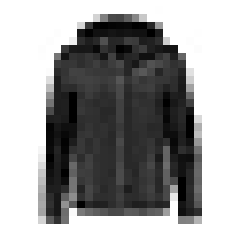

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [8]:
X_valid.shape

(5000, 28, 28)

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

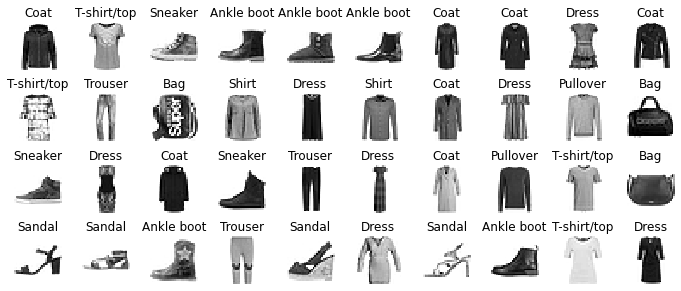

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Build the Model with Sequential API

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  # softmax beclass classes are exclusive

#  # Equivalent:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [18]:
model.get_layer('dense') is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()
weights

array([[-0.06919642,  0.04775378, -0.004123  , ...,  0.00436367,
         0.06732574, -0.05872791],
       [-0.00078522,  0.04610636,  0.01308839, ...,  0.04571428,
         0.02658889, -0.01165732],
       [-0.01842697,  0.04532614,  0.01023983, ...,  0.05410974,
        -0.00603486,  0.01237008],
       ...,
       [-0.01082064,  0.0317373 , -0.03691077, ...,  0.0002464 ,
        -0.04941431,  0.03777086],
       [ 0.01751766,  0.01833576, -0.00630905, ..., -0.05344044,
        -0.0284797 , -0.02798757],
       [-0.04711431,  0.05878493, -0.06315582, ...,  0.04248603,
         0.03225534, -0.01855467]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7201 - accuracy: 0.7646 - val_loss: 0.5045 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4883 - accuracy: 0.8295 - val_loss: 0.4527 - val_accuracy: 0.8406
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4433 - accuracy: 0.8459 - val_loss: 0.4187 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4173 - accuracy: 0.8541 - val_loss: 0.4014 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3973 - accuracy: 0.8605 - val_loss: 0.4097 - val_accuracy: 0.8566
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3805 - accuracy: 0.8669 - val_loss: 0.3732 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3674 - accuracy: 0.8703 - val_loss: 0.3609 - val_accuracy:

In [25]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

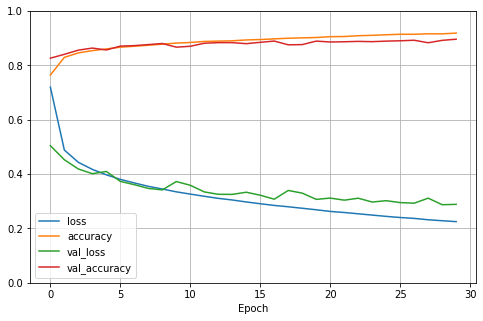

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epoch')
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 64.7614 - accuracy: 0.8514


[64.76142883300781, 0.8514000177383423]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [31]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [32]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

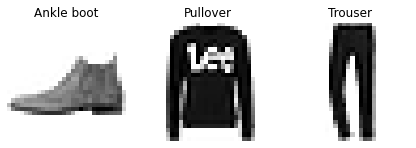

In [33]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Regression 
Using California housing problem

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0118 - val_loss: 1.0527
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9315 - val_loss: 0.8203
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8123 - val_loss: 0.7518
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7569 - val_loss: 0.7077
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7131 - val_loss: 0.6661
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6794 - val_loss: 0.6349
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6484 - val_loss: 0.6098
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6201 - val_loss: 0.5831
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5985 - val_loss: 0.5626
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5780 - val_loss: 0.5449

In [38]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 981us/step - loss: 0.4579


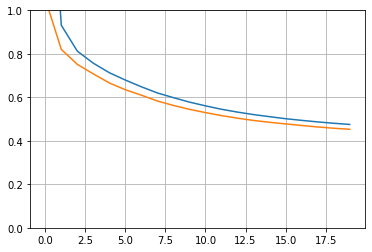

In [39]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
y_pred

array([[1.3144495],
       [1.3040403],
       [1.9997079]], dtype=float32)